In [1]:
import pandas as pd
#  pip install pandas_summary
from pandas_summary import DataFrameSummary

# Competencia de Kaggle

[ir a Kaggle](https://www.kaggle.com/c/rossmann-store-sales/data)

[3er puesto](https://github.com/entron/entity-embedding-rossmann)

# Métrica de la competencia

$$
\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

donde:

- $y_i$ las ventas de un día particular de un store
- $\hat{y}_i$ ventas estimadas por el modelo
- $n$ es el número de predicciones realizadas

## Importamos dataset

La competencia permitía agregar datos externos para realizar la predicción

The following tables are available in the datasets:

| Archivo      | Descripción| Origen de Datos|
|--------------|--------------------------------------------------------------------|--|
| train.csv        | training set: información del store día a día, ventas, clientes, si es feriado, etc | Kaggle |
| store.csv       | Información general del store, por ejemplo datos del competidor | Kaggle |
| store_states.csv | Mapea de store a estado - Dato externo| Externos |
| state_names.csv  | Mapea estados a acronimo de estado | Externos |
| googletrend.csv  | Tendencias por semana - Dato externo| Externos|
| weather.csv      | Condiciones meteorológicas por día | Externos|

In [5]:
PATH = 'rossmann/'

In [6]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather']
train, store, store_states, state_names, googletrend, weather = [pd.read_csv(PATH + fname+'.csv', 
                                                                             low_memory=False) for fname in table_names]

In [7]:
display(train.head())
display(DataFrameSummary(train).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


/tmp/ipykernel_5400/1287631888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(train).summary())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.0,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,NaN,1017209.0
mean,558.429727,3.998341,NaN,5773.818972,633.145946,0.830107,0.381515,NaN,0.178647
std,321.908651,1.997391,NaN,3849.926175,464.411734,0.375539,0.485759,NaN,0.383056
min,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
25%,280.0,2.0,NaN,3727.0,405.0,1.0,0.0,NaN,0.0
50%,558.0,4.0,NaN,5744.0,609.0,1.0,0.0,NaN,0.0
75%,838.0,6.0,NaN,7856.0,837.0,1.0,1.0,NaN,0.0
max,1115.0,7.0,NaN,41551.0,7388.0,1.0,1.0,NaN,1.0
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


In [8]:
train.groupby('Store').count()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,942,942,942,942,942,942,942,942
2,942,942,942,942,942,942,942,942
3,942,942,942,942,942,942,942,942
4,942,942,942,942,942,942,942,942
5,942,942,942,942,942,942,942,942
...,...,...,...,...,...,...,...,...
1111,942,942,942,942,942,942,942,942
1112,942,942,942,942,942,942,942,942
1113,942,942,942,942,942,942,942,942


- Mirar counts que todos tienen la misma cantidad
- Ninguno tiene missing
- Los tipos tambien es interesante observar

In [9]:
train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [10]:
display(store)
display(store.tail())
display(DataFrameSummary(store).summary())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


/tmp/ipykernel_5400/1344015571.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(store).summary())


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.0,NaN,NaN,1112.0,761.0,761.0,1115.0,571.0,571.0,NaN
mean,558.0,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.17472,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.0,NaN,NaN,20.0,1.0,1900.0,0.0,1.0,2009.0,NaN
25%,279.5,NaN,NaN,717.5,4.0,2006.0,0.0,13.0,2011.0,NaN
50%,558.0,NaN,NaN,2325.0,8.0,2010.0,1.0,22.0,2012.0,NaN
75%,836.5,NaN,NaN,6882.5,10.0,2013.0,1.0,37.0,2013.0,NaN
max,1115.0,NaN,NaN,75860.0,12.0,2015.0,1.0,50.0,2015.0,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


5

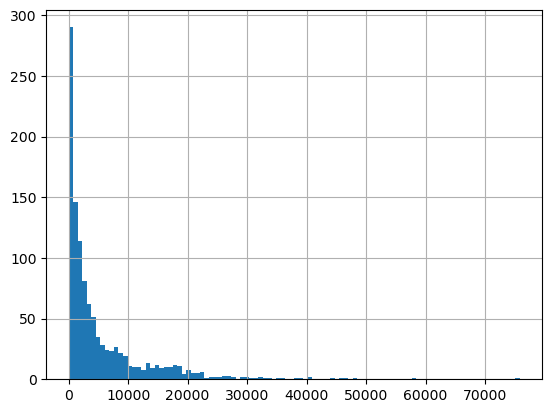

In [11]:
store.CompetitionDistance.hist(bins=100)
display(store.CompetitionDistance[store.CompetitionDistance.apply(lambda x: x<40)].count())


Descripción de algunas columnas que quizas no sean tan claras:

- `Customers`: La cantidad de clientes por día
- `Open`: Indicador si el store estaba abierto o cerrado: 0 = closed, 1 = open
- `StateHoliday`: Indica feriado en ese estado. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- `SchoolHoliday`: Inidica si el store fue afectado por el feriado escolar
- `StoreType`: Tipos de store: a, b, c, d
- `Assortment`: Describe el nivel de surtido de la tienda: a = basic, b = extra, c = extended
- `CompetitionDistance`: Distancia en metros al competidor
- `CompetitionOpenSince[Month/Year]`: Fecha en que abrío la competencia
- `Promo`: Si el store esta corriendo una promoción ese día
- `Promo2`: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- `Promo2Since[Year/Week]`: describes the year and calendar week when the store started participating in Promo2
- `PromoInterval`: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [12]:
store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [13]:
store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [14]:
display(store_states.head(20))
display(DataFrameSummary(store_states).summary())

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN
5,6,SN
6,7,SH
7,8,SH
8,9,NW
9,10,"HB,NI"


/tmp/ipykernel_5400/2892612828.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(store_states).summary())


,Store,State
count,1115.0,NaN
mean,558.0,NaN
std,322.01708,NaN
min,1.0,NaN
25%,279.5,NaN
50%,558.0,NaN
75%,836.5,NaN
max,1115.0,NaN
counts,1115,1115
uniques,1115,12


In [15]:
display(state_names.head(20))
display(DataFrameSummary(state_names).summary())

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB
5,Hamburg,HH
6,Hessen,HE
7,MecklenburgVorpommern,MV
8,Niedersachsen,"HB,NI"
9,NordrheinWestfalen,NW


/tmp/ipykernel_5400/221226592.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(state_names).summary())


,StateName,State
count,16,16
unique,16,16
top,BadenWuerttemberg,BW
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


In [16]:
display(googletrend)
display(DataFrameSummary(googletrend).summary())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67
...,...,...,...
2067,Rossmann_DE_SL,2015-08-30 - 2015-09-05,95
2068,Rossmann_DE_SL,2015-09-06 - 2015-09-12,47
2069,Rossmann_DE_SL,2015-09-13 - 2015-09-19,80
2070,Rossmann_DE_SL,2015-09-20 - 2015-09-26,57


/tmp/ipykernel_5400/2881928802.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(googletrend).summary())


,file,week,trend
count,NaN,NaN,2072.0
mean,NaN,NaN,63.814189
std,NaN,NaN,12.650246
min,NaN,NaN,0.0
25%,NaN,NaN,55.0
50%,NaN,NaN,64.0
75%,NaN,NaN,72.0
max,NaN,NaN,100.0
counts,2072,2072,2072
uniques,14,148,68


In [17]:
display(weather)
display(DataFrameSummary(weather[['Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'Precipitationmm']]).summary())

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,Saarland,2015-09-13,21,17,12,16,14,12,100,88,...,31.0,15.0,10.0,27,10,50.0,1.02,7.0,Rain,113
15836,Saarland,2015-09-14,18,14,11,15,12,7,99,85,...,31.0,13.0,4.0,32,16,53.0,9.91,5.0,Rain-Thunderstorm,213
15837,Saarland,2015-09-15,16,12,9,11,8,7,93,77,...,31.0,12.0,10.0,34,14,NaN,0.00,5.0,Rain,193
15838,Saarland,2015-09-16,19,15,11,16,13,10,97,90,...,31.0,10.0,4.0,32,14,45.0,20.07,7.0,Rain-Thunderstorm,147


,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,Precipitationmm
count,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,14667.0,15840.0
mean,14.644129,10.388952,6.19899,93.659596,74.282891,50.158586,22.766604,11.972222,5.551306,0.831718
std,8.646012,7.37926,6.526391,7.67853,13.486552,19.960216,8.988618,5.872844,1.68771,2.513506
min,-11.0,-13.0,-15.0,44.0,30.0,4.0,3.0,2.0,0.0,0.0
25%,8.0,4.0,1.0,90.75,65.0,34.0,16.0,8.0,5.0,0.0
50%,15.0,11.0,7.0,94.0,76.0,49.0,21.0,11.0,6.0,0.0
75%,21.0,16.0,11.0,100.0,85.0,66.0,27.0,14.0,7.0,0.25
max,39.0,31.0,24.0,100.0,100.0,100.0,101.0,53.0,8.0,58.93
counts,15840,15840,15840,15840,15840,15840,15840,15840,14667,15840
uniques,51,45,40,53,71,93,44,29,9,41


In [18]:
weather.columns

Index(['file', 'Date', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees'],
      dtype='object')